# Human Resources Analytics | Predicting Employee Churn in Python

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Human Resources Analytics Predicting Employee Churn in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score


In [4]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##    CHAPTER 1  - Introduction to HR Analytics

#### Exercício 1 - Introduction and overview

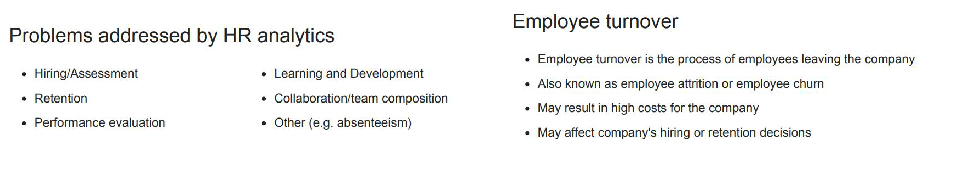

In [5]:
#vídeo
plot_2('problems_hr', 'churn', wspace=0.1)

Exercício 2

In [6]:
# Finding categorical variables

# Read "turnover.csv" and save it in a DataFrame called data
data = pd.read_csv(data_folder + "turnover.csv")

# Get some information on the types of variables in data
print(data.info())

# Take a quick look to the first 5 rows of data
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Exercício 3

In [7]:
# Observing categoricals

# Print the unique values of the "department" column
print(data.department.unique(), "\n")

# Print the unique values of the "salary" column
print(data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'] 

['low' 'medium' 'high']


#### Exercício 4 - Transforming categorical variables

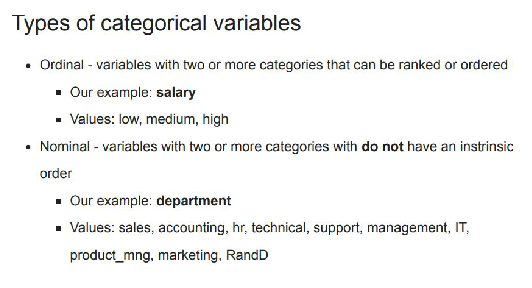

In [8]:
#vídeo
plot_1('cat_types', right=1.2)

Exercício 5

In [9]:
# Encoding categories

# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')

# Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

# Encode categories
data.salary = data.salary.cat.codes

data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


Exercício 6

In [10]:
# Getting dummies

# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department)

# Take a quick look to the first 5 rows of the new DataFrame called departments
departments.head()


,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


Exercício 7

In [11]:
# Dummy trap

# A dummy trap is a situation where different dummy variables convey the same information. In this case, if an employee is,
# say, from the accounting department (i.e. value in the accounting column is 1), then you're certain that s/he is not from
# any other department (values everywhere else are 0). Thus, you could actually learn about his/her department by looking
# at all the other departments.

# For that reason, whenever n dummies are created (in your case, 10), only n - 1 (in your case, 9) of them are enough, and 
# the n-th column's information is already included.

# Therefore, you will get rid of the old department column, drop one of the department dummies to avoid dummy trap, and 
# then the two DataFrames.

# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

# Drop the old column "department" as you don't need it anymore
data = data.drop("department", axis=1)

# Join the new dataframe "departments" to your employee dataset: done
data = data.join(departments)

data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


#### Exercício 8 - Descriptive Statistics

In [12]:
#vídeo

# Turnover rate (stayed vs left)
# Correlations


Exercício 9

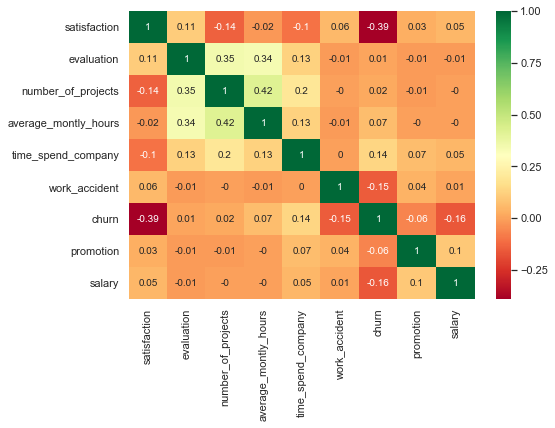


- Wrong statement: Correlation between employee satisfaction and churn is not strong since it is negative.
(A negative correlation doesn’t mean the correlation between both variables is weak)



In [13]:
# Correlations in the employee data 

data = pd.read_csv(data_folder + "turnover.csv")
data.salary = data.salary.astype('category')
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])
data.salary = data.salary.cat.codes

sns.heatmap(round(data.corr(), 2), cmap='RdYlGn', annot=True, annot_kws={"size": 10})
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("""
- Wrong statement: Correlation between employee satisfaction and churn is not strong since it is negative.
(A negative correlation doesn’t mean the correlation between both variables is weak)
""")

In [14]:
# pôr como estava
data = data.drop("department", axis=1); data = data.join(departments)

Exercício 10

In [15]:
# Percentage of employees who churn

# Use len() function to get the total number of observations and save it as the number of employees
n_employees = len(data)

# Print the number of employees who left/stayed
print(data.churn.value_counts(), "\n")

# Print the percentage of employees who left/stayed
print(data.churn.value_counts()/n_employees*100)

0    11428
1     3571
Name: churn, dtype: int64 

0    76.191746
1    23.808254
Name: churn, dtype: float64


# CHAPTER 2 - Predicting employee turnover


#### Exercício 1 - Splitting the data

In [16]:
#vídeo

Exercício 2

In [17]:
# Separating Target and Features

# Set the target and features

# Choose the dependent variable column (churn) and set it as target
target = data.churn

# Drop column churn and set everything else as features
features = data.drop("churn",axis=1)


Exercício 3

In [18]:
# Spliting employee data

# Import the function for splitting dataset into train and test
from sklearn.model_selection import train_test_split

# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
target_train, target_test, features_train, features_test = train_test_split(target, features, 
                                                                            test_size=0.25, random_state=42)


#### Exercício 4 - Introduction to Decision Tree classification

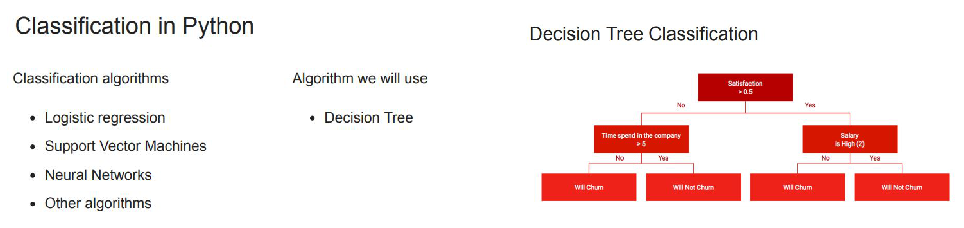

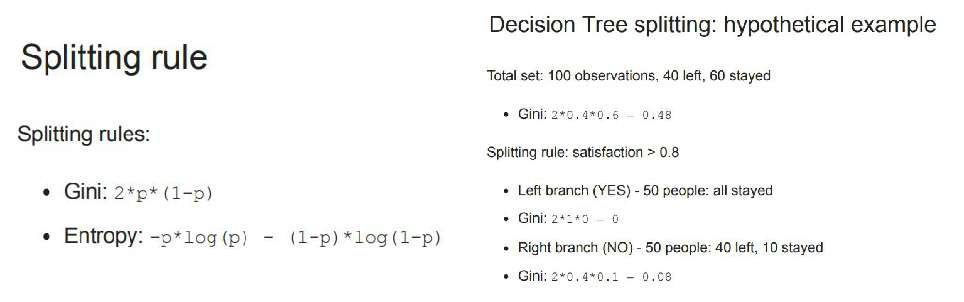

In [19]:
#vídeo
plot_2('classification', 'dt', wspace=0.2); print("="*120); plot_2('decision_tree', 'dt2')

Exercício 5

In [20]:
# Computing Gini index

#number of people who stayed/left
stayed = 37
left = 1138

#sum of stayed and left
total = stayed + left

#gini index
gini = 2*(stayed/total)*(left/total)
gini

0.060995563603440474

Exercício 6

In [21]:
# Splitting the tree

# Gini index in case of splitting by variable A or B
gini_A = 0.65
gini_B = 0.15

# check which Gini is lower and use it for spliting
if gini_A < gini_B:
    print("split by A!")
else:
    print("split by B!")


split by B!


#### Exercício 7 - Predicting employee churn using decision trees

In [22]:
#vídeo

from sklearn.tree import DecisionTreeClassifier

Exercício 8

In [23]:
# Fitting the tree to employee data

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Apply a decision tree model to fit features to the target
model.fit(features_train, target_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Exercício 9

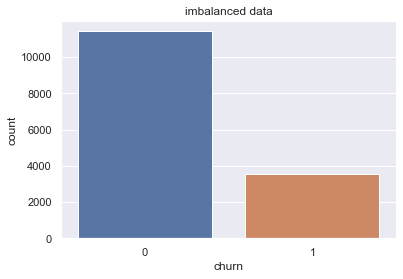


Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2853
           1       0.95      0.96      0.96       897

    accuracy                           0.98      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.98      0.98      0.98      3750


AUC train: 1.0
AUC test: 0.9735753129663429

Aqui faz mais sentido usar o AUC ou f1-score.


In [24]:
# Checking the accuracy of prediction - ??? vou usar outras métricas de avaliação

sns.countplot(data.churn); plt.title('imbalanced data'); plt.show()

##################

from sklearn.metrics import classification_report, roc_auc_score

predictions = model.predict(features_test)

# Classification report
print("\nClassification report:\n", classification_report(target_test, predictions))

#####################################################

# Compute predicted probabilities: y_pred_prob
y_pred_prob_scaled = model.predict_proba(features_test)[:, 1]

# Compute and print AUC score
print("\nAUC train: {}".format(roc_auc_score(target_train, model.predict_proba(features_train)[:, 1])))
print("AUC test: {}".format(roc_auc_score(target_test, y_pred_prob_scaled)))

####
print("\nAqui faz mais sentido usar o AUC ou f1-score.")

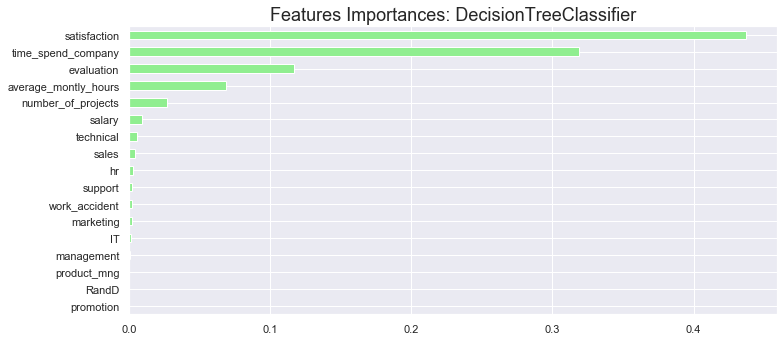

In [25]:
# Create a pd.Series of features importances
importances = pd.Series(data=model.feature_importances_, index=data.drop('churn', axis=1).columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.tail(30).plot(kind='barh', color='lightgreen')
plt.title('Features Importances: {}'.format('DecisionTreeClassifier'), fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 10 - Interpretation of the decision tree

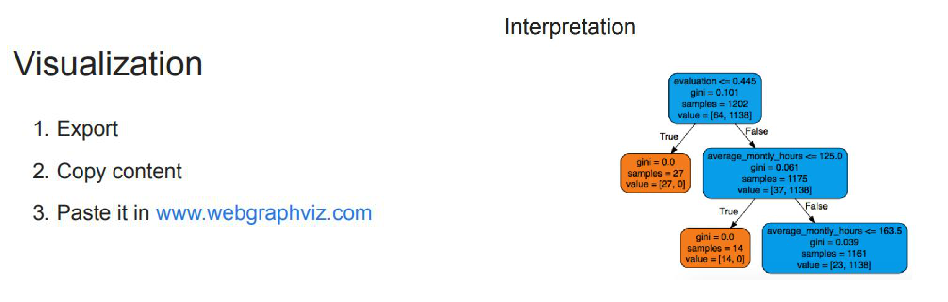

In [26]:
#vídeo
plot_2('visualization', 'interpretation')

http://www.webgraphviz.com/

Exercício 11

In [27]:
# Exporting the tree

# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model.fit(features_train, target_train)

# Export the tree to a dot file
export_graphviz(model, data_folder + "tree.dot")

Exercício 12

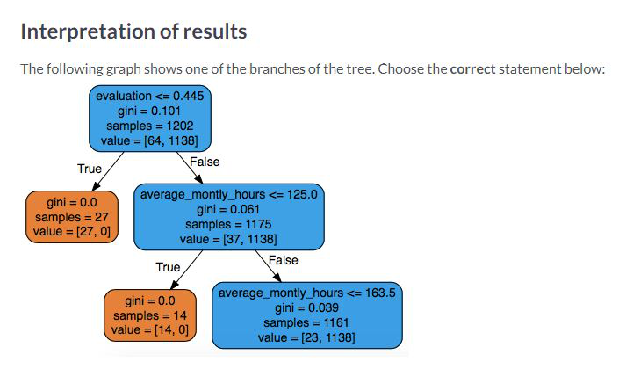

According to the graph, when average_monthly_hours is less than or equal to 125, complete purity is achieved.


In [28]:
# Interpretation of results

plot_1('ex_12', right=1.4, bottom=-0.7)

print("""According to the graph, when average_monthly_hours is less than or equal to 125, complete purity is achieved.""")

# CHAPTER 3 - Evaluating the turnover prediction model

#### Exercício 1 - Tuning employee turnover classifier

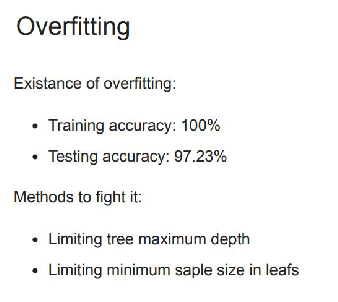

In [29]:
#vídeo
plot_1('overfitting')

Exercício 2

In [30]:
# Pruning the tree

# Overfitting is a classic problem in analytics, especially for the decision tree algorithm. Once the tree is fully grown, 
# it may provide highly accurate predictions for the training sample, yet fail to be that accurate on the test set. 
# For that reason, the growth of the decision tree is usually controlled by:

# - “Pruning” the tree and setting a limit on the maximum depth it can have.
# - Limiting the minimum number of observations in one leaf of the tree.

# In this exercise, you will:
# - prune the tree and limit the growth of the tree to 5 levels of depth
# - fit it to the employee data
# - test prediction results on both training and testing sets.

# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
model_depth_5.fit(features_train, target_train)

# Print the accuracy of the prediction for the training set
print(model_depth_5.score(features_train, target_train)*100)

# Print the accuracy of the prediction for the test set
print(model_depth_5.score(features_test, target_test)*100)


97.71535247577563
97.06666666666666


Exercício 3

In [31]:
# Limiting the sample size

# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

# Fit the model
model_sample_100.fit(features_train, target_train)

# Print the accuracy of the prediction (in percentage points) for the training set
print(model_sample_100.score(features_train,target_train)*100)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_sample_100.score(features_test, target_test)*100)


96.57747355320473
96.13333333333334


#### Exercício 4 - Evaluating the model

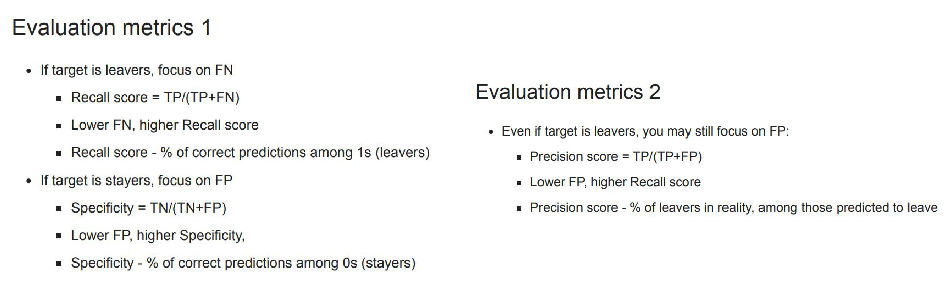

In [32]:
#vídeo
plot_2('evaluation_1', 'evaluation_2')

Exercício 5

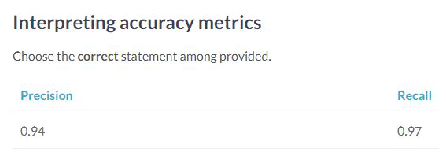

94% of churn predictions were correct.


In [33]:
# Interpreting accuracy metrics

plot_1('ex_5')
print("""94% of churn predictions were correct.""")

Exercício 6

In [34]:
# Calculating accuracy metrics: precision

# Precision = Nr of True Positives / (Nr of True Positives + Nr of False Positives).

# Import the function to calculate precision score
from sklearn.metrics import precision_score

# Predict whether employees will churn using the test set
prediction = model.predict(features_test)

# Calculate precision score by comparing target_test with the prediction
print("Precision:", precision_score(target_test, prediction))


Precision: 0.9463894967177243


Exercício 7

In [35]:
# Calculating accuracy metrics: recall

# Recall = Nr of True Positives / (Nr of True Positives + Nr of False Negatives)

# Import the function to calculate recall score
from sklearn.metrics import recall_score

# Use the initial model to predict churn
prediction = model.predict(features_test)

# Calculate recall score by comparing target_test with the prediction
print("Recall:", recall_score(target_test, prediction))


Recall: 0.9643255295429208


#### Exercício 8 - Targeting both leavers and stayers

In [36]:
#vídeo
# AUC score

Exercício 9

In [37]:
# Calculating the ROC/AUC score

# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Use initial model to predict churn (based on features_test)
prediction = model.predict(features_test)

# Calculate ROC/AUC score by comparing target_test with the prediction
print("AUC score:", roc_auc_score(target_test, prediction))

AUC score: 0.9735753129663429


#### Exercício 10 - Class imbalance

In [38]:
#vídeo

Exercício 11

In [39]:
# Balancing classes

# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Fit the model
model_depth_5_b.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print("Score without balanced weighting:", model_sample_100.score(features_test, target_test)*100)
print("Score with balanced weighting:", model_depth_5_b.score(features_test,target_test)*100)

Score without balanced weighting: 96.13333333333334
Score with balanced weighting: 93.70666666666668


Exercício 12

In [40]:
# Comparison of Employee attrition models

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7, random_state=42, class_weight='balanced')
# Fit it to the training component
model_depth_7_b.fit(features_train, target_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(features_test)

# Print the recall score
print("Recall without balanced weighting:", recall_score(target_test,prediction))
# Print the recall score for the balanced model
print("Recall with balanced weighting:", recall_score(target_test,prediction_b))


# Print the ROC/AUC score
print("\nAUC score without balanced weighting:", roc_auc_score(target_test,prediction))
# Print the ROC/AUC score for the balanced model
print("AUC score with balanced weighting:", roc_auc_score(target_test,prediction_b))

Recall without balanced weighting: 0.9643255295429208
Recall with balanced weighting: 0.9319955406911928

AUC score without balanced weighting: 0.9735753129663429
AUC score with balanced weighting: 0.959863876199084


# CHAPTER 4 - Choosing the best turnover prediction model


#### Exercício 1 - Hyperparameter tuning

In [41]:
#vídeo

Exercício 2

In [42]:
# Cross-validation using sklearn

# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
cross_val_score(model, features, target, cv=10)


array([0.98      , 0.98533333, 0.968     , 0.97      , 0.964     ,
       0.98066667, 0.99      , 0.99      , 1.        , 1.        ])

Exercício 3

In [43]:
# Setting up GridSearch parameters

# Generate values for maximum depth
depth = [i for i in range(5, 21, 1)]

# Generate values for minimum sample size
samples = [i for i in range(50, 500, 50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)
parameters

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350, 400, 450]}

Exercício 4

In [44]:
# Implementing GridSearch

# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 50}


#### Exercício 5 - Important features for predicting attrition

In [45]:
#vídeo
# Feature Importances

Exercício 6

In [46]:
# Interpreting importance

# Choose the correct statement among those provided.
# Feature importances sum up to 100%.

Exercício 7

In [47]:
# Sorting important features

model_best = DecisionTreeClassifier(class_weight='balanced', 
                                    max_depth=param_search.best_params_['max_depth'],
                                    min_samples_leaf=param_search.best_params_['min_samples_leaf'],
                                    random_state=42)

model_best.fit(features_train, target_train)

# Calculate feature importances
feature_importances = model_best.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.449715
time_spend_company,0.392422
evaluation,0.103792
average_montly_hours,0.035041
number_of_projects,0.014705
technical,0.003300
hr,0.001024
promotion,0.000000
salary,0.000000
work_accident,0.000000


Exercício 8

In [48]:
# Selecting important features

# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance > 0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

selected_features

,importance
satisfaction,0.449715
evaluation,0.103792
number_of_projects,0.014705
average_montly_hours,0.035041
time_spend_company,0.392422


Exercício 9

In [49]:
# Develop and test the best model

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print("Score:", model_best.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print("Recall:", recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print("ROC/AUC score:", roc_auc_score(target_test, prediction_best) * 100)



Score: 93.46666666666667
Recall: 91.9732441471572
ROC/AUC score: 92.95472582401672


#### Exercício 10 - end

In [50]:
#vídeo

# Fim